In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/2315676.txt', na_values = [-9999], skiprows=[1], delim_whitespace=True)
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0


In [2]:
data.shape

(41065, 6)

In [3]:
data['TEMP_F'] = (data['TMAX'] + data['TMIN']) / 2
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0,-16.0


In [4]:
data.tail()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,42.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,NaN
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,44.5
41064,GHCND:FI000007501,SODANKYLA-AWS-FI,20201007,47.0,50.0,44.0,47.0


In [5]:
data['TAVG'].fillna(data['TEMP_F'], inplace=True)
data.shape

(41065, 7)

In [6]:
data.tail()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,42.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,NaN
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,44.5
41064,GHCND:FI000007501,SODANKYLA-AWS-FI,20201007,47.0,50.0,44.0,47.0


In [7]:
data.isna().sum()

STATION            0
STATION_NAME       0
DATE               0
TAVG             183
TMAX             769
TMIN            1946
TEMP_F          2623
dtype: int64

In [8]:
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0


In [9]:
data.dropna(subset=['TAVG'],inplace=True)

In [10]:
data.isna().sum()

STATION            0
STATION_NAME       0
DATE               0
TAVG               0
TMAX             676
TMIN            1856
TEMP_F          2440
dtype: int64

In [11]:
def fahr_to_celsius(temp_fahr):
    convert_temp= (temp_fahr - 32) / 1.8
    return convert_temp

data['TEMP_C'] = data['TAVG'].apply(fahr_to_celsius)
data['DATE_STR'] = data['DATE'].astype(str)
data['YEAR'] = data['DATE_STR'].str.slice(start=0,stop=4)
data['MONTH'] = data['DATE_STR'].str.slice(start=4,stop=6)

In [12]:
data.dtypes

STATION          object
STATION_NAME     object
DATE              int64
TAVG            float64
TMAX            float64
TMIN            float64
TEMP_F          float64
TEMP_C          float64
DATE_STR         object
YEAR             object
MONTH            object
dtype: object

In [13]:
data.loc[data['MONTH'] == '01', 'Season'] = 'Winter'
data.loc[data['MONTH'] == '12', 'Season'] = 'Winter'
data.loc[data['MONTH'] == '02', 'Season'] = 'Winter'
data.loc[350:355,:]

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F,TEMP_C,DATE_STR,YEAR,MONTH,Season
350,GHCND:FI000007501,SODANKYLA-AWS-FI,19081216,30.0,32.0,28.0,30.0,-1.111111,19081216,1908,12,Winter
351,GHCND:FI000007501,SODANKYLA-AWS-FI,19081217,24.5,32.0,17.0,24.5,-4.166667,19081217,1908,12,Winter
352,GHCND:FI000007501,SODANKYLA-AWS-FI,19081218,28.5,33.0,24.0,28.5,-1.944444,19081218,1908,12,Winter
353,GHCND:FI000007501,SODANKYLA-AWS-FI,19081219,32.5,34.0,31.0,32.5,0.277778,19081219,1908,12,Winter
354,GHCND:FI000007501,SODANKYLA-AWS-FI,19081220,11.5,34.0,-11.0,11.5,-11.388889,19081220,1908,12,Winter
355,GHCND:FI000007501,SODANKYLA-AWS-FI,19081221,19.0,32.0,6.0,19.0,-7.222222,19081221,1908,12,Winter


In [14]:
data.loc[data['MONTH'] == '06', 'Season'] = 'Summer'
data.loc[data['MONTH'] == '07', 'Season'] = 'Summer'
data.loc[data['MONTH'] == '08', 'Season'] = 'Summer'
data.loc[230:235,:]

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F,TEMP_C,DATE_STR,YEAR,MONTH,Season
230,GHCND:FI000007501,SODANKYLA-AWS-FI,19080818,46.0,60.0,32.0,46.0,7.777778,19080818,1908,08,Summer
231,GHCND:FI000007501,SODANKYLA-AWS-FI,19080819,45.0,52.0,38.0,45.0,7.222222,19080819,1908,08,Summer
232,GHCND:FI000007501,SODANKYLA-AWS-FI,19080820,44.5,54.0,35.0,44.5,6.944444,19080820,1908,08,Summer
233,GHCND:FI000007501,SODANKYLA-AWS-FI,19080821,42.0,57.0,27.0,42.0,5.555556,19080821,1908,08,Summer
234,GHCND:FI000007501,SODANKYLA-AWS-FI,19080822,42.0,56.0,28.0,42.0,5.555556,19080822,1908,08,Summer
235,GHCND:FI000007501,SODANKYLA-AWS-FI,19080823,47.5,57.0,38.0,47.5,8.611111,19080823,1908,08,Summer


In [15]:
data.loc[data['MONTH'] == '09','Season'] = 'Autumn'
data.loc[data['MONTH'] == '10','Season'] = 'Autumn'
data.loc[data['MONTH'] == '11','Season'] = 'Autumn'
data.loc[280:285,:]

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F,TEMP_C,DATE_STR,YEAR,MONTH,Season
280,GHCND:FI000007501,SODANKYLA-AWS-FI,19081007,42.0,50.0,34.0,42.0,5.555556,19081007,1908,10,Autumn
281,GHCND:FI000007501,SODANKYLA-AWS-FI,19081008,44.5,51.0,38.0,44.5,6.944444,19081008,1908,10,Autumn
282,GHCND:FI000007501,SODANKYLA-AWS-FI,19081009,33.0,40.0,26.0,33.0,0.555556,19081009,1908,10,Autumn
283,GHCND:FI000007501,SODANKYLA-AWS-FI,19081010,27.0,32.0,22.0,27.0,-2.777778,19081010,1908,10,Autumn
284,GHCND:FI000007501,SODANKYLA-AWS-FI,19081011,36.0,44.0,28.0,36.0,2.222222,19081011,1908,10,Autumn
285,GHCND:FI000007501,SODANKYLA-AWS-FI,19081012,38.5,46.0,31.0,38.5,3.611111,19081012,1908,10,Autumn


In [16]:
data.loc[data['MONTH'] == '03', 'Season'] = 'Spring'
data.loc[data['MONTH'] == '04', 'Season'] = 'Spring'
data.loc[data['MONTH'] == '05', 'Season'] = 'Spring'
data.loc[100:105,:]

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F,TEMP_C,DATE_STR,YEAR,MONTH,Season
100,GHCND:FI000007501,SODANKYLA-AWS-FI,19080410,28.5,39.0,18.0,28.5,-1.944444,19080410,1908,04,Spring
101,GHCND:FI000007501,SODANKYLA-AWS-FI,19080411,31.0,37.0,25.0,31.0,-0.555556,19080411,1908,04,Spring
102,GHCND:FI000007501,SODANKYLA-AWS-FI,19080412,25.5,40.0,11.0,25.5,-3.611111,19080412,1908,04,Spring
103,GHCND:FI000007501,SODANKYLA-AWS-FI,19080413,38.0,45.0,31.0,38.0,3.333333,19080413,1908,04,Spring
104,GHCND:FI000007501,SODANKYLA-AWS-FI,19080414,35.5,43.0,28.0,35.5,1.944444,19080414,1908,04,Spring
105,GHCND:FI000007501,SODANKYLA-AWS-FI,19080415,36.0,44.0,28.0,36.0,2.222222,19080415,1908,04,Spring


In [17]:
seasonal_avg = data.groupby(['YEAR','Season'], as_index =False)['TAVG', 'TMAX', 'TMIN', 'TEMP_F','TEMP_C'].mean()

C:\Users\COMPUTER\AppData\Local\Temp/ipykernel_18140/695887495.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seasonal_avg = data.groupby(['YEAR','Season'], as_index =False)['TAVG', 'TMAX', 'TMIN', 'TEMP_F','TEMP_C'].mean()


In [18]:
seasonal_avg.head()

,YEAR,Season,TAVG,TMAX,TMIN,TEMP_F,TEMP_C
0,1908,Autumn,28.653409,36.920455,20.386364,28.653409,-1.859217
1,1908,Spring,27.775862,37.505747,18.045977,27.775862,-2.346743
2,1908,Summer,52.566667,64.033333,41.100000,52.566667,11.425926
3,1908,Winter,9.804598,19.080460,0.528736,9.804598,-12.330779
4,1909,Autumn,31.719512,39.853659,23.585366,31.719512,-0.155827


In [19]:
data['ref_temp'] = data['TEMP_C']
total_avg = data.groupby(['Season'], as_index = False)['ref_temp'].mean()

In [20]:
total_avg.head()

,Season,ref_temp
0,Autumn,-0.434000
1,Spring,-1.993220
2,Summer,12.463088
3,Winter,-12.877159


In [21]:
anomalies = seasonal_avg.merge(total_avg, on='Season', how='outer')
anomalies.head()

,YEAR,Season,TAVG,TMAX,TMIN,TEMP_F,TEMP_C,ref_temp
0,1908,Autumn,28.653409,36.920455,20.386364,28.653409,-1.859217,-0.434
1,1909,Autumn,31.719512,39.853659,23.585366,31.719512,-0.155827,-0.434
2,1910,Autumn,28.864286,36.714286,21.014286,28.864286,-1.742063,-0.434
3,1911,Autumn,29.697531,37.345679,22.049383,29.697531,-1.279150,-0.434
4,1912,Autumn,28.267857,35.059524,21.476190,28.267857,-2.073413,-0.434


In [22]:
anomalies['diff'] = anomalies['TEMP_C'] - anomalies['ref_temp']
anomalies.head()

,YEAR,Season,TAVG,TMAX,TMIN,TEMP_F,TEMP_C,ref_temp,diff
0,1908,Autumn,28.653409,36.920455,20.386364,28.653409,-1.859217,-0.434,-1.425217
1,1909,Autumn,31.719512,39.853659,23.585366,31.719512,-0.155827,-0.434,0.278174
2,1910,Autumn,28.864286,36.714286,21.014286,28.864286,-1.742063,-0.434,-1.308063
3,1911,Autumn,29.697531,37.345679,22.049383,29.697531,-1.279150,-0.434,-0.845149
4,1912,Autumn,28.267857,35.059524,21.476190,28.267857,-2.073413,-0.434,-1.639412


In [23]:
autumn = anomalies.loc[anomalies['Season'] == 'Autumn']

winter = anomalies.loc[anomalies['Season'] == 'Winter']

spring = anomalies.loc[anomalies['Season'] == 'Spring']

summer = anomalies.loc[anomalies['Season'] == 'Summer']

In [24]:
min_temps = min(summer['TEMP_C'].min(), spring['TEMP_C'].min(), winter['TEMP_C'].min(), autumn['TEMP_C'].min())
min_temps = min_temps - 10
max_temps = max(summer['TEMP_C'].max(), spring['TEMP_C'].max(), winter['TEMP_C'].max(), autumn['TEMP_C'].max())
max_temps = max_temps + 20

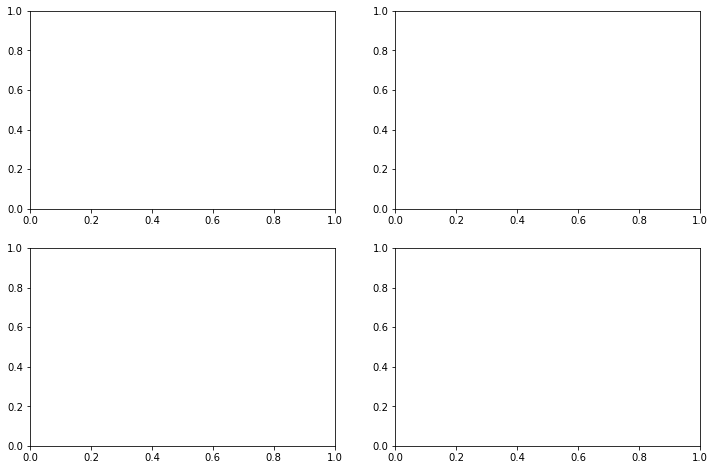

In [25]:
fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(12,8))

In [26]:
ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

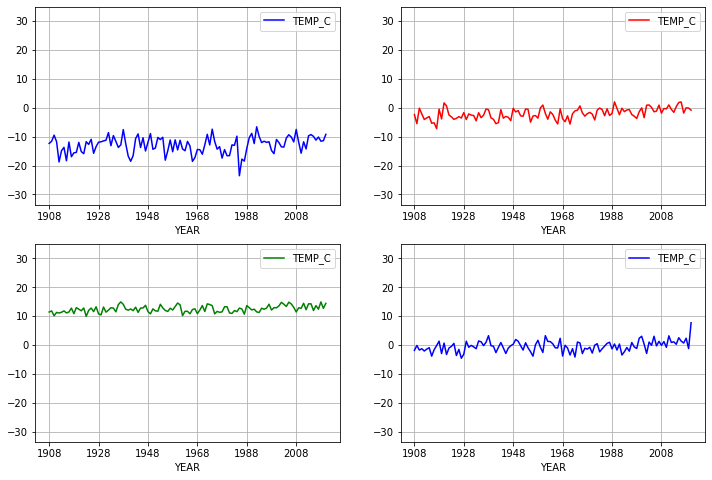

In [27]:
winter.plot(ax=ax1, x='YEAR', y='TEMP_C', c='blue', lw=1.5, 
            ylim=[min_temps, max_temps], grid=True)
spring.plot(ax=ax2, x='YEAR', y='TEMP_C', c='red', lw=1.5, 
            ylim=[min_temps, max_temps], grid=True)
summer.plot(ax=ax3, x='YEAR', y='TEMP_C', c='green', lw=1.5, 
            ylim=[min_temps, max_temps], grid=True)
autumn.plot(ax=ax4, x='YEAR', y='TEMP_C', c='blue', lw=1.5, 
            ylim=[min_temps, max_temps], grid=True)

fig

In [28]:
fig.suptitle('Seasonal Average Temperature Sodankylä 1908 - 2018')

ax1.set_ylabel('Temperature (Celsius)')
ax2.set_ylabel('Temperature (Celsius)')
ax3.set_ylabel('Temperature (Celsius)')
ax4.set_ylabel('Temperature (Celsius)')

Text(368.4363636363635, 0.5, 'Temperature (Celsius)')

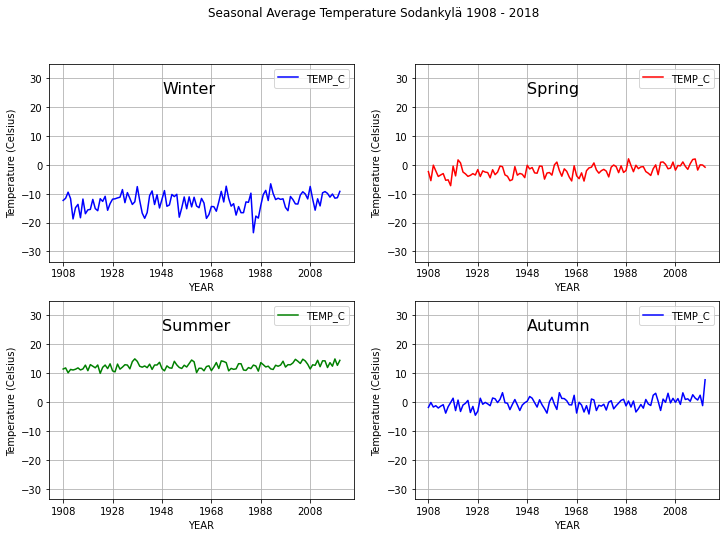

In [29]:
ax1.annotate('Winter', xy= (40,25),
             fontsize = 16)
ax2.annotate('Spring', xy= (40,25),
             fontsize = 16)
ax3.annotate('Summer', xy= (40,25),
             fontsize = 16)
ax4.annotate('Autumn', xy= (40,25),
             fontsize = 16)
fig